In [1]:
import os, sys
import json
import networkx as nx
import bct
import numpy as np
import pickle
import graph_tool.all as gt
import matplotlib.pyplot as plt
from sqlitedict import SqliteDict
import utils_network
import utils_networkx
import utils_gt
import utils_network_metrics
import utils_filtration_metrics

In [8]:
# define which dataset to analyze
# suffix = "" # original sample
# suffix = "_v2" # sample with more than 100 nodes
suffix = "_v2_rw-1.0"
# suffix = "_v2_rw-0.375"
# suffix = "_v2_rw-0.0"

In [11]:
db = SqliteDict("/srv/home/shubhankar/04272022/script_1_small_v2_rw-1.0.sqlite")

In [12]:
len(db)

56

In [15]:
db[55]

{'n': 422,
 'betti_0': array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.

In [9]:
db = SqliteDict("/srv/home/shubhankar/04272022/filtration_metrics_small%s.sqlite" % suffix)

In [10]:
len(db)

345

In [45]:
betti_0 = []
betti_0_null_mean = []
betti_0_null_std = []

betti_1 = []
betti_1_null_mean = []
betti_1_null_std = []

# betti_2 = []
# betti_2_null_mean = []
# betti_2_null_std = []

# MDL = []
# MDL_null_mean = []
# MDL_null_std = []

d = []
d_null_mean = []
d_null_std = []

conform = []
conform_null_mean = []
conform_null_std = []

for i in range(len(db)):
    
    betti_0.append(list(db[i]['betti_0']))
    betti_0_null_mean.append(list(db[i]['betti_0_null_mean']))
    betti_0_null_std.append(list(db[i]['betti_0_null_std']))
    
    betti_1.append(list(db[i]['betti_1']))
    betti_1_null_mean.append(list(db[i]['betti_1_null_mean']))
    betti_1_null_std.append(list(db[i]['betti_1_null_std']))
    
#     betti_2.append(list(db[i]['betti_2']))
#     betti_2_null_mean.append(list(db[i]['betti_2_null_mean']))
#     betti_2_null_std.append(list(db[i]['betti_2_null_std']))

#     MDL.append(db[i]['MDL'])
#     MDL_null_mean.append(db[i]['MDL_null_mean'])
#     MDL_null_std.append(db[i]['MDL_null_std'])
    
    d.append(list(db[i]['d']))
    d_null_mean.append(list(db[i]['d_null_mean']))
    d_null_std.append(list(db[i]['d_null_std']))
    
    conform.append(list(db[i]['conform']))
    conform_null_mean.append(list(db[i]['conform_null_mean']))
    conform_null_std.append(list(db[i]['conform_null_mean']))

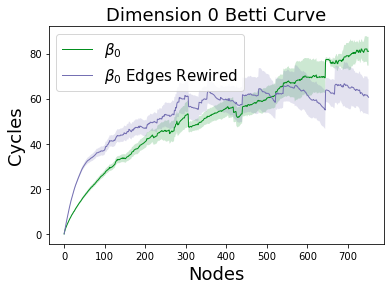

In [46]:
x_1, mean_1 = utils_filtration_metrics.plot_curve(betti_0, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:emerald green')
x_2, mean_2 = utils_filtration_metrics.plot_curve(betti_0_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('Dimension 0 Betti Curve', fontsize = 18)
plt.xlabel('Nodes', fontsize = 18)
plt.ylabel('Cycles', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [47]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [48]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

-1659.4913234579653

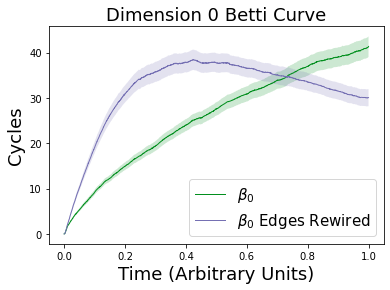

In [49]:
x_1, mean_1 = utils_filtration_metrics.plot_curve_normalized_idx(betti_0, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:emerald green')
x_2, mean_2 = utils_filtration_metrics.plot_curve_normalized_idx(betti_0_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('Dimension 0 Betti Curve', fontsize = 18)
plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
plt.ylabel('Cycles', fontsize = 18)
plt.legend(loc = 'lower right', fontsize = 15)

In [50]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [51]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

-5.76385923312597

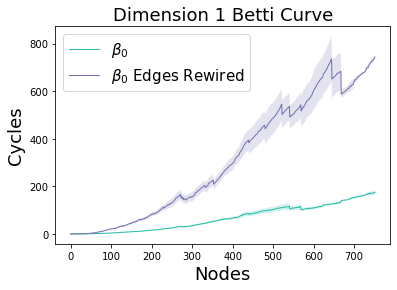

In [52]:
x_1, mean_1 = utils_filtration_metrics.plot_curve(betti_1, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:tealish')
x_2, mean_2 = utils_filtration_metrics.plot_curve(betti_1_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('Dimension 1 Betti Curve', fontsize = 18)
plt.xlabel('Nodes', fontsize = 18)
plt.ylabel('Cycles', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [53]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [54]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

-183656.17641378718

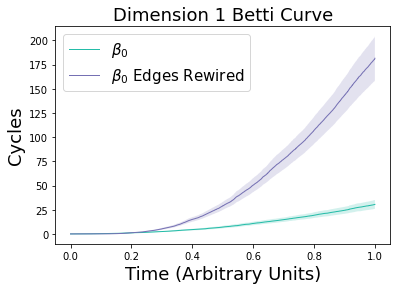

In [55]:
x_1, mean_1 = utils_filtration_metrics.plot_curve_normalized_idx(betti_1, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:tealish')
x_2, mean_2 = utils_filtration_metrics.plot_curve_normalized_idx(betti_1_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('Dimension 1 Betti Curve', fontsize = 18)
plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
plt.ylabel('Cycles', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [56]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [57]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

-41.58788179211589

In [58]:
# x_1, mean_1 = utils_filtration_metrics.plot_curve(betti_2, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:peacock blue')
# x_2, mean_2 = utils_filtration_metrics.plot_curve(betti_2_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
# plt.title('Dimension 2 Betti Curve', fontsize = 18)
# plt.xlabel('Nodes', fontsize = 18)
# plt.ylabel('Cycles', fontsize = 18)
# plt.legend(loc = 'lower right', fontsize = 15)

In [59]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [60]:
# utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

In [61]:
# x_1, mean_1 = utils_filtration_metrics.plot_curve_normalized_idx(betti_2, curve_label = '$\\beta_{}$'.format(0), curve_color = 'xkcd:peacock blue')
# x_2, mean_2 = utils_filtration_metrics.plot_curve_normalized_idx(betti_2_null_mean, curve_label = '$\\beta_{}$ Edges Rewired'.format(0), curve_color = '#7570b3')
# plt.title('Dimension 2 Betti Curve', fontsize = 18)
# plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
# plt.ylabel('Cycles', fontsize = 18)
# plt.legend(loc = 'lower right', fontsize = 15)

In [62]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [63]:
# utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

In [64]:
# x_1, mean_1 = utils_filtration_metrics.plot_curve(MDL, curve_label = 'MDL', curve_color = '#CA0020')
# x_2, mean_2 = utils_filtration_metrics.plot_curve(MDL_null_mean, curve_label = 'MDL Edges Rewired', curve_color = '#7570B3')
# plt.title('MDL', fontsize = 18)
# plt.xlabel('Nodes', fontsize = 18)
# plt.ylabel('MDL (bits)', fontsize = 18)
# plt.legend(loc = 'upper left', fontsize = 15)

In [65]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [66]:
# utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

In [67]:
# x_1, mean_1 = utils_filtration_metrics.plot_curve(MDL, curve_label = 'MDL', curve_color = '#CA0020')
# x_2, mean_2 = utils_filtration_metrics.plot_curve(MDL_null_mean, curve_label = 'MDL Edges Rewired', curve_color = '#7570B3')
# plt.title('MDL', fontsize = 18)
# plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
# plt.ylabel('MDL (bits)', fontsize = 18)
# plt.legend(loc = 'upper left', fontsize = 15)

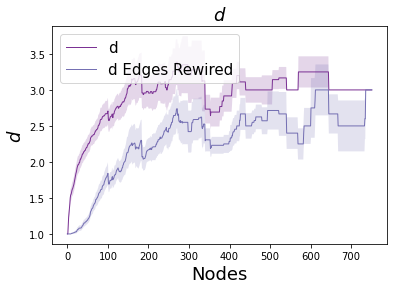

In [68]:
x_1, mean_1 = utils_filtration_metrics.plot_curve(d, curve_label = 'd', curve_color = '#7b3294')
x_2, mean_2 = utils_filtration_metrics.plot_curve(d_null_mean, curve_label = 'd Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('$d$', fontsize = 18)
plt.xlabel('Nodes', fontsize = 18)
plt.ylabel('$d$', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [69]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [70]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

471.6176411969352

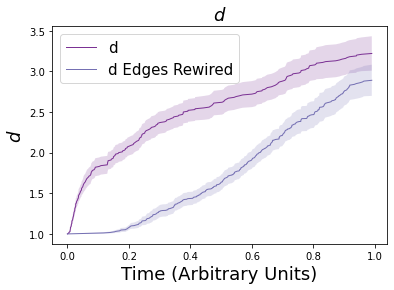

In [71]:
x_1, mean_1 = utils_filtration_metrics.plot_curve_normalized_idx(d, curve_label = 'd', curve_color = '#7b3294')
x_2, mean_2 = utils_filtration_metrics.plot_curve_normalized_idx(d_null_mean, curve_label = 'd Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('$d$', fontsize = 18)
plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
plt.ylabel('$d$', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [72]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [73]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

0.7674248796713847

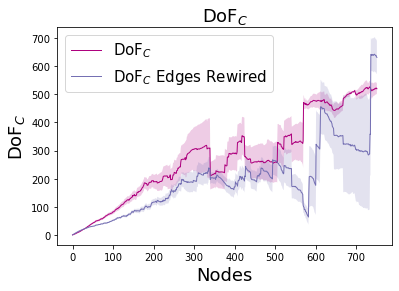

In [74]:
x_1, mean_1 = utils_filtration_metrics.plot_curve(conform, curve_label = 'DoF$_C$', curve_color = '#ae017e')
x_2, mean_2 = utils_filtration_metrics.plot_curve(conform_null_mean, curve_label = 'DoF$_C$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('DoF$_C$', fontsize = 18)
plt.xlabel('Nodes', fontsize = 18)
plt.ylabel('DoF$_C$', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [75]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [76]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

63351.489062551176

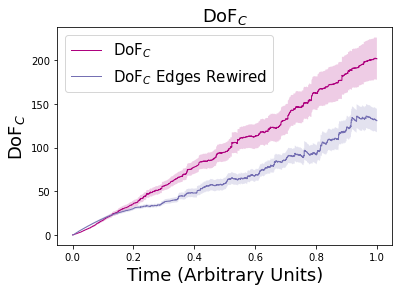

In [77]:
x_1, mean_1 = utils_filtration_metrics.plot_curve_normalized_idx(conform, curve_label = 'DoF$_C$', curve_color = '#ae017e')
x_2, mean_2 = utils_filtration_metrics.plot_curve_normalized_idx(conform_null_mean, curve_label = 'DoF$_C$ Edges Rewired'.format(0), curve_color = '#7570b3')
plt.title('DoF$_C$', fontsize = 18)
plt.xlabel('Time (Arbitrary Units)', fontsize = 18)
plt.ylabel('DoF$_C$', fontsize = 18)
plt.legend(loc = 'upper left', fontsize = 15)

In [78]:
# p_value = utils_filtration_metrics.permutation_testing(x_1, mean_1, x_2, mean_2)
# print(p_value)

In [79]:
utils_filtration_metrics.area_under_curve(x_1, mean_1) - utils_filtration_metrics.area_under_curve(x_2, mean_2)

33.653324378271535